# Advertising Sales Channel Prediction

Importing all the libraries

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

Reading the data set

In [168]:
df=pd.read_csv('C:/Users/yn/Desktop/Yuvi/DataTrained/PracticeProjets/Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


Droping the unnecessary column

In [169]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

Finding null values

In [170]:
df.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [171]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Seems like newspaper has ouliers

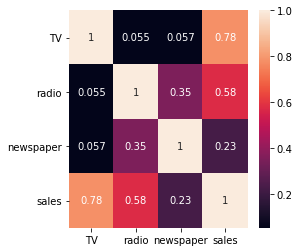

In [172]:
plt.figure(figsize=(4,4))
sns.heatmap(df.corr().abs(),annot=True)
plt.show()

TV is contributing 78% to predict the target Sales

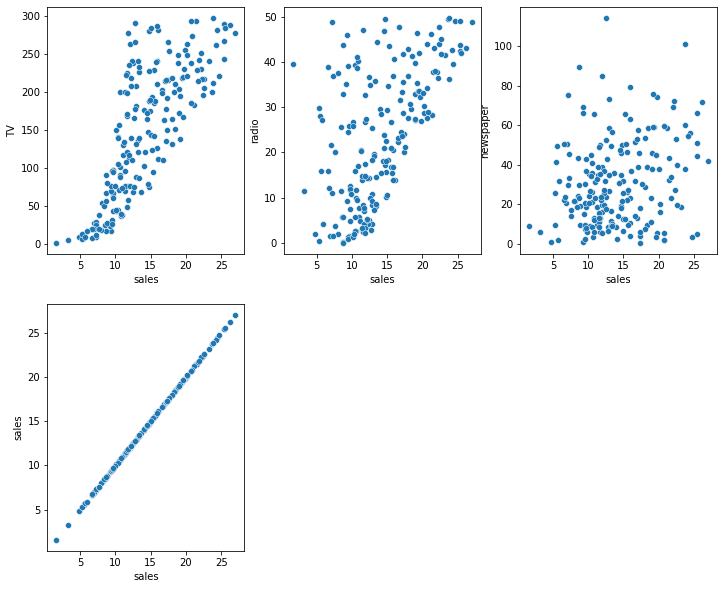

In [204]:
plt.figure(figsize=(12,10))
pltno=1
for col in df.columns:
    ax=plt.subplot(2,3,pltno)
    sns.scatterplot(x=df['sales'],y=df[col])
    pltno+=1
plt.show()

1. we can see positive trend for TV and Sales also Radio and Sales.
2. Could not see any trend for Newspaper

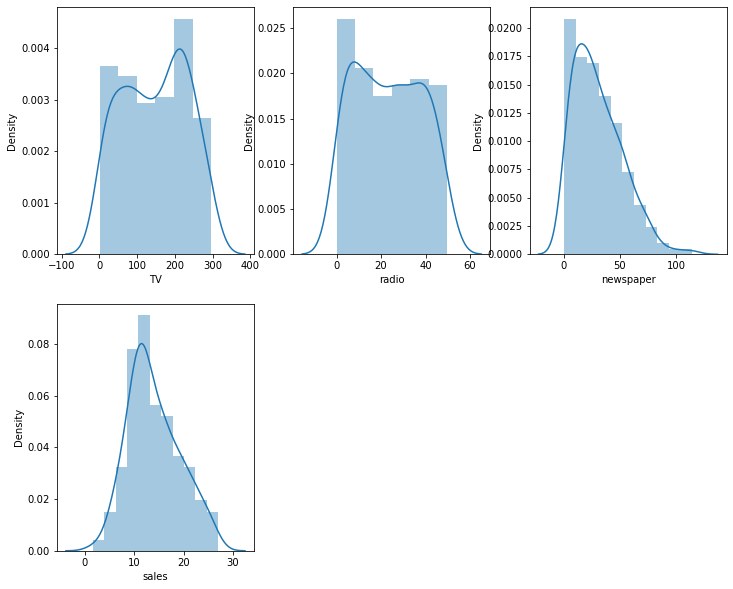

In [174]:
plt.figure(figsize=(12,10))
pltno=1
for col in df.columns:
    ax=plt.subplot(2,3,pltno)
    sns.distplot(df[col])
    pltno+=1
plt.show()

All features are normally distributed

In [205]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

There is no skewness in the dataset.

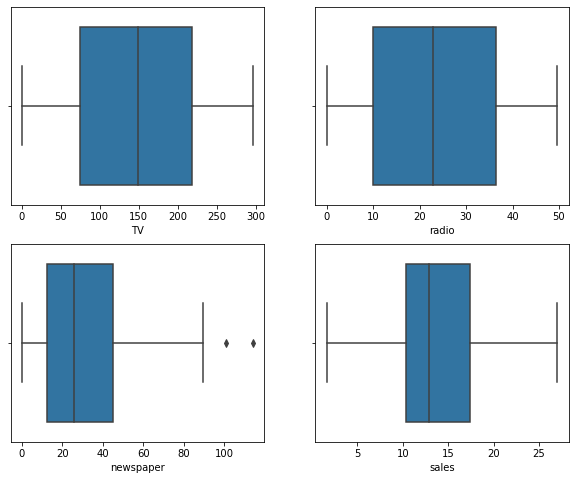

In [206]:
plt.figure(figsize=(10,8))
pltno=1
for col in df.columns:
    ax=plt.subplot(2,2,pltno)
    sns.boxplot(df[col])
    pltno+=1
plt.show()

There are 2 outliers in newspaper.

In [212]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1

In [213]:
news_high=q3.newspaper+(1.5*iqr.newspaper)
index=np.where(df['newspaper']>news_high)
df=df.drop(df.index[index])
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


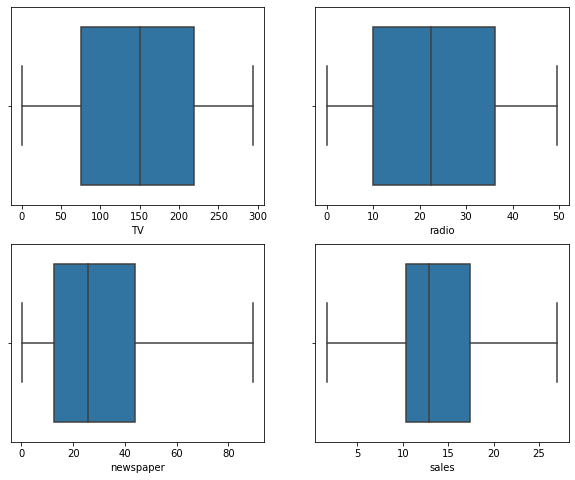

In [214]:
plt.figure(figsize=(10,8))
pltno=1
for col in df.columns:
    ax=plt.subplot(2,2,pltno)
    sns.boxplot(df[col])
    pltno+=1
plt.show()

We removed the outliers.

Spliting the feature and target variables.

In [215]:
X=df.drop(['sales'],axis=1)
y=df['sales']

In [216]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

Scaling the feature values to standard scale.

In [231]:
X_sc=StandardScaler().fit_transform(X)

### Building base model to find the best Random state

In [232]:
m_acc=0
b_rs=0
for i in range(1,200):
    lr=LinearRegression()
    X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.2,random_state=i)
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    acc=r2_score(y_test,y_pred)
    if(acc>m_acc):
        m_acc=acc
        b_rs=i
print('Accuracy: ',m_acc,'RS: ',b_rs)

Accuracy:  0.9477136584598764 RS:  90


spliting the data as train and test using the best Random State found.

In [233]:
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.2,random_state=90)

In [234]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor

initializing the models

In [236]:
rf=RandomForestRegressor()
kn=KNeighborsRegressor()
ad=AdaBoostRegressor()
lr=LinearRegression()

#### Building the base models and model selection

In [237]:
models=[rf,kn,ad,lr]
for m in models:
    m.fit(X_train,y_train)
    y_pred=m.predict(X_test)
    print('Mestrics for ',m)
    print('Accuracy:',r2_score(y_test,y_pred))
    print('MAE: ',mean_absolute_error(y_test,y_pred))
    print('MSE: ',mean_squared_error(y_test,y_pred),'\n')

Mestrics for  RandomForestRegressor()
Accuracy: 0.9819181383638619
MAE:  0.6227500000000002
MSE:  0.5451066500000008 

Mestrics for  KNeighborsRegressor()
Accuracy: 0.94138277616713
MAE:  0.9284999999999999
MSE:  1.7671099999999993 

Mestrics for  AdaBoostRegressor()
Accuracy: 0.9562446471307846
MAE:  0.9157136398723438
MSE:  1.3190751208070872 

Mestrics for  LinearRegression()
Accuracy: 0.9477136584598764
MAE:  1.0231352276209502
MSE:  1.5762554238734887 



### Cross validation

In [239]:
for m in models:
    print('Cross val score for ',m,':',cross_val_score(m,X_test,y_test,cv=5).mean())

Cross val score for  RandomForestRegressor() : 0.6930759204637968
Cross val score for  KNeighborsRegressor() : 0.8264263257124987
Cross val score for  AdaBoostRegressor() : 0.7635425179309847
Cross val score for  LinearRegression() : 0.8424569032270461


From above metrics, Linear Regression model works better for our dataset.

## Regularization

In [240]:
from sklearn.linear_model import RidgeCV,Ridge
rdg_cv=RidgeCV(alphas=(0.01,0.1, 1.0))
rdg_cv.fit(X_train,y_train)
print(rdg_cv.alpha_)

0.1


In [241]:
rdg=Ridge(alpha=0.1)
rdg.fit(X_train,y_train)
print("Training accuracy: ",rdg.score(X_train,y_train))
y_pred=rdg.predict(X_test)
print('Mestrics for ',rdg)
print('Accuracy:',r2_score(y_test,y_pred))
print('MSE: ',mean_squared_error(y_test,y_pred),'\n')

Training accuracy:  0.87915393342308
Mestrics for  Ridge(alpha=0.1)
Accuracy: 0.9476312959159872
MSE:  1.5787383745391033 



Ridge Regularization shows that our LinerRegression model is not overfitting neither underfitting.

### Final Model

In [243]:
lr=LinearRegression()
lr.fit(X_train,y_train)
print("Training accuracy: ",lr.score(X_train,y_train))
y_pred=lr.predict(X_test)
print('Mestrics for ',lr)
print('Accuracy:',r2_score(y_test,y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))
print('MSE: ',mean_squared_error(y_test,y_pred),'\n')

Training accuracy:  0.8791542940797823
Mestrics for  LinearRegression()
Accuracy: 0.9477136584598764
MAE:  1.0231352276209502
MSE:  1.5762554238734887 



Our final model able to provide 95% of accuracy score.

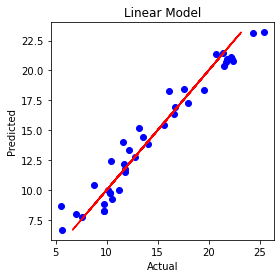

In [245]:
plt.figure(figsize=(4,4))
plt.scatter(x=y_test,y=y_pred,color='b')
plt.plot(y_pred,y_pred,color='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Model')
plt.show()

#### Saving the model

importing pickle and saving the model

In [247]:
import pickle
pickle.dump(lr,open('C:/Users/yn/Desktop/Yuvi/DataTrained/Saved Models- Practice Projects/AdvertisingSalesChannelPrediction.pkl','wb'))

Loading the saved model

In [249]:
final_model=pickle.load(open('C:/Users/yn/Desktop/Yuvi/DataTrained/Saved Models- Practice Projects/AdvertisingSalesChannelPrediction.pkl','rb'))

Predicting using the loaded model

In [250]:
y_pred=final_model.predict(X_test)
result_set=pd.DataFrame({'Actual':np.round(y_test),'Predicted':np.round(y_pred)})
result_set

,Actual,Predicted
163,18.0,17.0
22,6.0,7.0
69,22.0,21.0
193,20.0,18.0
40,17.0,16.0
93,22.0,21.0
39,22.0,20.0
146,13.0,15.0
15,22.0,21.0
72,9.0,10.0
